<a href="https://colab.research.google.com/github/jailtoncarlos/xpeducacao/blob/main/bootcamp_ciencia_dados/export_jupyter_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprando o ambiente

In [1]:
# biliotecas necessárias para exportar pra pdf
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic texlive-latex-extra
# atualizar todos os pacotes LaTex
!tlmgr update --self --all

#  Instalar um pacote específico
# !tlmgr install <nome do pacote>

!pip install pexpect

#  Usando o Google Colab para Download e Visualização Local
from google.colab import files
from shutil import move

import os

from google.colab import drive
drive.mount('/content/drive')

path_directory = '/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook'
nome_arquivo = 'btc-dad234-capitulo6.ipynb'

# Obter o diretório atual
current_dir = os.getcwd()

print(">>> Diretório:", path_directory)
print(">>> Nome do Arquivo:", nome_arquivo)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java liblog4j1.2-

# Customizar Arquivo LaTex e exportar para Pdf

In [2]:
#sys_file_operations
from asyncio.tasks import sleep
from datetime import date
from google.colab import drive
from google.colab import files

import os
import pexpect
import time

import subprocess
import shutil
import logging
import re



# Configure logging to record messages at DEBUG level
logging.basicConfig(level=logging.DEBUG, format='%(levelname)s: %(message)s')

class SystemUtility:
    @classmethod
    def check_tool(cls, tool_name, test_args=None):
        """
        Checks if a tool or command is installed in the environment.
        Takes the tool name and an optional list of arguments for testing.
        Returns True if the tool is installed, False otherwise.
        """
        if not isinstance(tool_name, str):
            raise ValueError("Tool name must be a string")

        if test_args and not isinstance(test_args, list):
            raise ValueError("Arguments must be a list")

        if shutil.which(tool_name):
            # If test arguments are provided, execute to confirm installation
            if test_args:
                try:
                    subprocess.run([tool_name] + test_args, check=True)
                    logging.debug(f"Tool '{tool_name}' is installed and works as expected.")
                    return True
                except subprocess.CalledProcessError as e:
                    logging.error(f"Error while testing tool '{tool_name}': {e}")
                    return False
            else:
                logging.debug(f"Tool '{tool_name}' is installed.")
                return True
        else:
            logging.warning(f"Tool '{tool_name}' not found.")
            return False

    @classmethod
    def run_command(cls, command: list) -> dict[str, str]:
        """
        Executes a system command.
        Returns a dictionary with details of the result.
        Raises exception in case of error.
        """
        if not isinstance(command, list) or not command:
            raise ValueError("Command must be a non-empty list")

        result_dict = {}
        try:
            if cls.check_tool("jupyter", ["--version"]):
                # Execute the system command
                result = subprocess.run(command, capture_output=True, text=True, check=True)

                # Create a dictionary with result details
                result_dict = {
                    "args": result.args,
                    "return_code": result.returncode,
                    "stdout": result.stdout.strip(),
                    "stderr": result.stderr.strip(),
                }

                logging.debug(f"Command executed successfully: {result_dict}")

        except subprocess.CalledProcessError as e:
            error_dict = {
                "args": e.cmd,
                "return_code": e.returncode,
                "stdout": e.stdout,
                "stderr": e.stderr,
                "message": f"Error executing command: {e}",
            }
            logging.error(f"Command execution error: {error_dict}")
            raise RuntimeError(f"Error executing command: {error_dict}")

        return result_dict


class FileOperations:
    @classmethod
    def file_download(cls, filename: str) -> None:
        """
        Downloads a file using Google Colab's file download utility.
        Logs any exceptions and raises a runtime error if download fails.
        """
        logging.debug(f"Downloading file {filename}...")
        try:
            files.download(filename)
            logging.debug("File downloaded successfully!")
        except Exception as e:
            logging.error(f"Error when downloading: {e}")
            raise RuntimeError(f"Failed to download {filename}: {e}")

    @classmethod
    def read_file(cls, filename: str) -> str:
        """
        Reads the content of a file and returns it as a string.
        Logs exceptions and raises a runtime error if the file cannot be read.
        """
        logging.debug(f"Reading file {filename}...")
        try:
            with open(re.sub(r'"', '', filename), 'r') as f:
                content = f.read()
            logging.debug("File read successfully!")
            return content
        except Exception as e:
            logging.error(f"Error when reading file {filename}: {e}")
            raise RuntimeError(f"Could not read {filename}: {e}")

    @classmethod
    def save_file(cls, filename: str, content: str) -> None:
        """
        Saves the file contents.
        Logs exceptions and raises a runtime error if the file cannot be saved.
        """
        logging.debug(f"Save content in file {filename}...")
        try:
            filename_clean = re.sub(r'"', '', filename)

            with open(filename_clean, "w") as f:
                f.write(content)

            logging.debug(f"Content successfully saved in file {filename_clean}")

        except Exception as e:
            logging.error(f"Error while saving content to file {filename_clean}: {e}")
            raise RuntimeError(f"Could not save content to file {filename_clean}: {e}")

    @classmethod
    def copy_file(cls, source_file: str, destination_file: str) -> None:
        """
        Copies a file from source to destination.
        Logs any exceptions and raises a runtime error if the copy operation fails.
        """
        logging.debug(f"Copying file from {source_file} to {destination_file}...")
        try:
            shutil.copy(source_file, re.sub(r'"', '', destination_file))
            logging.debug("File copied successfully!")
        except Exception as e:
            logging.error(f"Error when copying file from {source_file} to {destination_file}: {e}")
            raise RuntimeError(f"Failed to copy {source_file} to {destination_file}: {e}")

    @classmethod
    def delete_files(cls, path_directory: str) -> None:
        """
        Deletes all files in the specified directory.
        Handles exceptions, logs errors, and raises a runtime error if any deletion fails.
        """
        logging.debug(f"Deleting files in directory {path_directory}...")
        try:
            for filename in os.listdir(path_directory):
                file_path = os.path.join(path_directory, filename)
                if os.path.isfile(file_path):
                    os.remove(file_path)
                    logging.debug(f"Deleted file: {file_path}")
            logging.debug("Files deleted successfully!")
        except Exception as e:
            logging.error(f"Error when deleting files in {path_directory}: {e}")
            raise RuntimeError(f"Failed to delete files in {path_directory}: {e}")

    @classmethod
    def get_files(cls, path_directory: str, file_extension: str) -> dict[str, list[str]]:
        """
        Returns a dictionary of filenames in the specified directory with the given file extension.
        Handles exceptions and raises a runtime error if the directory walk fails.
        """
        logging.debug(f"Getting filenames in directory {path_directory} with extension {file_extension}...")
        all_filenames = {}
        try:
            for root, _, files in os.walk(path_directory):
                if not all_filenames.get(root):
                    all_filenames[root] = []
                all_filenames[root].extend([f for f in files if f.endswith(file_extension)])
            logging.debug("Filenames retrieved successfully!")
            return all_filenames
        except Exception as e:
            logging.error(f"Error when getting filenames in {path_directory}: {e}")
            raise RuntimeError(f"Failed to get filenames in {path_directory}: {e}")

    @classmethod
    def get_current_dir(cls) -> str:
        """
        Returns the current working directory.
        Handles exceptions and raises a runtime error if unable to retrieve the directory.
        """
        try:
            current_dir = os.getcwd()
            logging.debug(f"Current directory: {current_dir}")
            return current_dir
        except Exception as e:
            logging.error(f"Error when getting current directory: {e}")
            raise RuntimeError(f"Could not get current directory: {e}")


In [12]:
from asyncio.tasks import sleep
from datetime import date
from google.colab import drive
from google.colab import files

import os
import pexpect
import time

import subprocess
import shutil
import logging
import re


class JupyterColabToPdf():
    @classmethod
    def mount_drive(cls):
        drive.mount('/content/drive')


    @classmethod
    def export_to_latex(cls, filename: str, temporary_dir: str = None) -> None:
        if temporary_dir is None:
            temporary_dir = FileOperations.get_current_dir()

        filename = re.sub(r'"', '', filename)

        logging.debug(f'Export LaTex file {filename} to {temporary_dir} ...')

        command = [
            "jupyter", "nbconvert",
            "--to", "latex",
            "--no-prompt",
            filename,
            "--output-dir", temporary_dir
        ]
        SystemUtility.run_command(command)

        # !jupyter nbconvert --to latex --no-prompt  {filename}  --output-dir={output_dir}

    @classmethod
    def latex_to_pdf(cls, filename: str, timeout_seconds: int = 10, max_attempts: int = 10) -> None:
        """
        Compiles a LaTex file to PDF using pdflatex.
        Waits for patterns and responds with "S" to any prompts.
        """
        logging.debug(f"Compiling {filename} to PDF with pdflatex")

        # !pdflatex {filename}
        # return
        filename = re.sub(r'"', '', filename)
        filename = f'"{filename}"'

        # Start the pdflatex process
        child = pexpect.spawn(f"pdflatex {filename}")

        attempts = 0

        while True:
            try:
                # Check for patterns and respond with "S" if needed
                index = child.expect([r'[\?\:\s]', pexpect.EOF, pexpect.TIMEOUT], timeout=timeout_seconds)
                attempts += 1

                logging.debug(f"{attempts} attempt(s) to respond to prompts")

                if index == 0:  # If a prompt is detected, send "S"
                    child.sendline("S")

                # Allow some time before checking again
                time.sleep(1)

                # Exit loop if process is not alive or attempts exceed maximum
                if not child.isalive() or attempts >= max_attempts:
                    raise RuntimeError(f"Processo interrompido após {attempts} tentativas ou processo inativo.\nExperimente utilizar o comando de forma direta !pdflatex {filename}")

            except pexpect.EOF:
                logging.debug("EOF encountered. Exiting loop.")
                break

            except pexpect.TIMEOUT:
                logging.debug("Timeout encountered. Exiting loop.")
                break

        # Ensure the child process is terminated
        if child.isalive():
            child.terminate()

        logging.debug(f"Finished compiling {filename} to PDF")

    @classmethod
    def latex_content_tranforme(cls, title: str, author: str, content: str) -> str:
        today = date.today().strftime('%d/%m/%Y')

        # hutf8x = hash('\\usepackage[utf8x]{inputenc}')
        # content = content.replace('\\usepackage[utf8x]{inputenc}', str(hutf8x))
        # content = content.replace('\\usepackage[mathletters]{ucs}', '\\usepackage[utf8]{inputenc}')
        # content = content.replace(str(hutf8x), '\\usepackage[utf8,combine]{ucs}')

        content = content.replace('\\usepackage[mathletters]{ucs}', '%\\usepackage[mathletters]{ucs}')
        content = content.replace('utf8x', 'utf8')

        content = content.replace('\\usepackage{geometry}', '%\\usepackage{geometry}')
        content = content.replace('\\geometry{verbose,tmargin=1in,bmargin=1in,lmargin=1in,rmargin=1in}', '')

        document_class = """
        \\documentclass[
            % -- opções da classe memoir --
            11pt,				% tamanho da fonte
            %openany,			% capítulos começam em qualquer página
            %twoside,			% para impressão em verso e anverso. Oposto a oneside
            %a4paper,			% tamanho do papel.
            % -- opções da classe abntex2 --
            %chapter=TITLE,		% títulos de capítulos convertidos em letras maiúsculas
            %section=TITLE,		% títulos de seções convertidos em letras maiúsculas
            %subsection=TITLE,	% títulos de subseções convertidos em letras maiúsculas
            %subsubsection=TITLE,% títulos de subsubseções convertidos em letras maiúsculas
            % -- opções do pacote babel --
            english,			% idioma adicional para hifenização
            french,				% idioma adicional para hifenização
            spanish,			% idioma adicional para hifenização
            brazil				% o último idioma é o principal do documento
            ]{report} % Classe do documento (exemplo: article, report, book)

    \\usepackage{lipsum}
    \\usepackage{scrlfile}
    %\\usepackage{inputenc}
    %\\usepackage{ucs} %suporte unicode


    %\\textbf{permite personalizar vários aspectos do sumário e de outros índices}
    \\usepackage{tocloft}

    %Inclusão de caracteres especiais ou emoticons, permite use símbolos, emoticons e outras figuras predefinidas
    \\usepackage{tikzsymbols}


    \\usepackage{geometry}
    % Configurar margens
    \\geometry{
      verbose,
      tmargin=1in,  % margem superior
      bmargin=1in,  % margem inferior
      lmargin=1in,  % margem esquerda
      rmargin=1in,  % margem direita
      headheight=15pt,  % altura do cabeçalho
      headsep=10pt,  % espaço entre cabeçalho e conteúdo
      footskip=20pt  % espaço entre rodapé e conteúdo
    }


    % CONFIGURAÇÃO SUMÁRIO - INÍCIO
    \\setcounter{tocdepth}{3}  % Profundidade do sumário (3 corresponde a subsubsections)

    % Outros pacotes e preâmbulos
    \\usepackage{tocloft}  % Pacote para personalizar o sumário

    % Comando para redefinir a profundidade do sumário para 4 níveis
    \\setcounter{secnumdepth}{3}  % Para numerar subsubsections (opcional)
    \\renewcommand{\\cftsecleader}{\\cftdotfill{\\cftdotsep}}  % Adiciona pontos entre o título e o número da página no sumário

    % Ajustar espaços entre seções
    \\setlength{\\cftsecnumwidth}{2em}  % Ajustar a largura dos números das seções
    \\setlength{\\cftsubsecnumwidth}{3em}  % Ajustar a largura para subseções
    \\setlength{\\cftsubsubsecnumwidth}{4em}  % Ajustar a largura para subsubseções

    % CONFIGURAÇÃO SUMÁRIO - FIM


    % CONFIGURAÇÃO CABEÇALHO/RODAPÉ - INÍCIO
    % Pacote para personalizar cabeçalho e rodapé
    \\usepackage{fancyhdr}

    % Configuração do cabeçalho e rodapé
    \\fancyhf{}  % Limpar qualquer configuração anterior


    % Configurar o conteúdo do cabeçalho
    % \\fancyhead[L]{Left Header}  % Cabeçalho à esquerda
    % \\fancyhead[C]{Center Header}  % Cabeçalho ao centro
    % \\fancyhead[R]{Jailton Paiva - 29/04/2024}  % Cabeçalho à direita

    %Redefinir linha do cabeçalho, espessura = 0
    \\renewcommand{\\headrulewidth}{0pt}

    % Configurar o rodapé
    \\fancyfoot[R]{\\thepage}  % Rodapé ao centro com número de página
    \\fancyfoot[L]{Jailton Paiva (jailtoncarlos@gmail.com) - 29/04/2024}  % Cabeçalho à direita

    %Redefinir linha do rodapé
    \\renewcommand{\\footrulewidth}{0.5pt}


    % Definir o estilo do cabeçalho
    % sem definir esse comando, o cabeçalho personalizado não é exibido
    \\pagestyle{fancy}

    % CONFIGURAÇÃO CABEÇALHO/RODAPÉ - FIM


    \\DeclareUnicodeCharacter{2501}{\\noindent\\hrulefill}
    \\DeclareUnicodeCharacter{2500}{\\rule{\\linewidth}{0.5pt}}  % Horizontal line character
    \\DeclareUnicodeCharacter{2502}{|}
    \\DeclareUnicodeCharacter{2570}{\\textbackslash}
    \\DeclareUnicodeCharacter{0301}{\\'}  % Mapeia para acento agudo
    \\DeclareUnicodeCharacter{0327}{\\c}  % Mapeia para cedilha
    \\DeclareUnicodeCharacter{0303}{\\~}  % Mapeia para tilde
    \\DeclareUnicodeCharacter{200B}{} % Mapeia para um espaço vazio (sem ação)
    \\DeclareUnicodeCharacter{25BA}{\\extbullet} % Usa um marcador como representação da seta para a direita
    \\DeclareUnicodeCharacter{2639}{\\Sadey} %emoticon rosto triste

        """
        content = content.replace('\\documentclass[11pt]{article}', document_class)

        # logging.debug(content[:5000])


        # Encontra o local para adicionar informações
        start_document = content.find("\\begin{document}")

        # Modificar o arquivo LaTex para incluir título, autor, data e sumário
        if start_document != -1:
            modified_content = (
                content[:start_document] +
                f"""
        \\title{{{title}}}
        \\author{{{author}}}
        \\date{{{today}}}

        \\begin{{document}}

        % Garantir que o estilo de cabeçalho e rodapé seja aplicado
        %\\pagestyle{{fancy}}

        \\maketitle

        \\tableofcontents  % Gerar o sumário


        """ +
                content[start_document+len("\\begin{document}"):]
            )
        else:
            # Se não houver \begin{document}, adicionar ao final
            modified_content = (
                content +
                f"""
        \\begin{{document}}
        %\\maketitle
        \\tableofcontents
        """
            )
        return modified_content

    @classmethod
    def export_colab_to_pdf(cls, title: str, author: str, file_path: str, temporary_dir: str = None, exclude_temporary_file: bool = True, download: bool = False):
        if temporary_dir is None:
            temporary_dir = FileOperations.get_current_dir()

        filename = os.path.basename(file_path)
        cls.export_to_latex(file_path, temporary_dir)

        filename_tex = filename.replace('ipynb', 'tex')
        latex_content = FileOperations.read_file(filename_tex)

        latex_modified_content = cls.latex_content_tranforme(title, author, latex_content)

        FileOperations.save_file(filename_tex, latex_modified_content)

        cls.latex_to_pdf(filename_tex)
        cls.latex_to_pdf(filename_tex)

        source_file = filename_tex.replace('tex', 'pdf')

        destination_file = file_path.replace('ipynb', 'pdf')
        FileOperations.copy_file(source_file, destination_file)

        if download:
            FileOperations.file_download(filename.replace('ipynb', 'pdf'))


In [ ]:
import logging

# Configurar logging para exibir mensagens no console
logging.basicConfig(
    level=logging.DEBUG,  # Definir nível de log
    format='%(levelname)s: %(message)s',  # Formato das mensagens de log
    force=True
)
# Recarregar as extensões
%reload_ext autoreload

# logging.debug("This is a debug message.")
# logging.info("This is an info message.")
# logging.warning("This is a warning message.")
# logging.error("This is an error message.")

# import sys; sys.exit()

# title = r'''
#     Bootcamp Cientista de Dados \\
#     Módulo 3: Técnicas para o processamento de Big Data \\
# '''

title = r'''
    Bootcamp Engenheiro(a) de Dados \\
    Módulo 1: Fundamentos em Engenharia de Dados \\
'''


author = 'Jailton Paiva (jailtoncarlos@gmail.com)'

# path_directory = '/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/'
# path_directory = '/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/ Módulo 3 - Técnicas para o Processamento do Big Data/colab_notebook/'
path_directory = '/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Engenheiro de Dados/Módulo 1 - Fundamentos em Engenharia de Dados/colab_notebook/'

# filesnames = JupyterColabToPdf.get_files(path_directory, ".ipynb")
# btc-dad234-desafio-colab.ipynb
# filesnames = ['analise-dataset-stroke-prediction-dataset.ipynb', ]


JupyterColabToPdf.mount_drive()
current_dir = FileOperations.get_current_dir()
FileOperations.delete_files(current_dir)
# all_filenames = FileOperations.get_files(path_directory, ".ipynb")
all_filenames = {}
# 'btc-dad234-capitulo5.ipynb', 'btc-bcd-tabalho-pratico-modulo3.ipynb'
all_filenames[path_directory] = ['bootcamp_eng_dados_mod1_trabalho_pratico.ipynb']

for dir, _files in all_filenames.items():
    logging.debug(dir)
    for fname in _files:
        filename_path = f'{os.path.join(dir, fname)}'
        # JupyterColabToPdf.export_to_latex(filename_path)
        JupyterColabToPdf.export_colab_to_pdf(title, author, filename_path, exclude_temporary_file=False)

In [ ]:
# !pdflatex '/content/btc-bcd-tabalho-pratico-modulo3.tex'
!pdflatex "bootcamp_eng_dados_mod1_trabalho_pratico.tex"

In [ ]:
# FileOperations.file_download(filename_path.replace('ipynb', 'pdf'))

# Exportar colab  notebook


* `TemplateExporter.exclude_input=True`: Define que a entrada do código no notebook não será incluída no PDF. Apenas o resultado das células de código e outras partes visíveis do notebook (como texto e figuras) serão mantidos. Isso é útil para criar relatórios limpos sem mostrar o código-fonte.
* `no-prompt`: Elimina os prompts de entrada e saída do notebook no PDF final. Sem esse parâmetro, os prompts de entrada (In[]) e saída (Out[]) seriam exibidos no PDF, o que pode criar um visual desordenado.
* `--disable-chromium-sandbox`: Este sinalizador instrui o processo de conversão do notebook Jupyter a desabilitar o sandbox do Chromium. A sandbox do Chromium é um recurso de segurança que isola o conteúdo da web do sistema subjacente, evitando que códigos maliciosos acessem ou modifiquem os recursos do sistema.
* `WebPDFExporter.disable_sandbox=True`: Esse sinalizador desativa especificamente o sandbox do WebPDFExporter, que é o componente responsável pela conversão de notebooks Jupyter para o formato PDF. Desativar o sandbox pode melhorar o desempenho, mas pode apresentar riscos de segurança, pois permite que o WebPDFExporter acesse e modifique potencialmente os recursos do sistema
*`--TagRemovePreprocessor.enabled=True` é usado no comando `nbconvert` para ativar um preprocessador específico que remove partes do notebook Jupyter baseadas em tags específicas.


Este parâmetro é parte do mecanismo de conversão que permite manipular um notebook Jupyter antes da exportação para outros formatos, como PDF ou HTML. Quando essa opção é habilitada, o `TagRemovePreprocessor` busca por tags especiais nas células do notebook para determinar quais partes devem ser removidas antes da conversão.

As tags são uma maneira de marcar células com metadados adicionais. Para usar o `TagRemovePreprocessor`, você precisa marcar células do notebook com uma tag que o preprocessador reconheça como um indicador de que aquela célula deve ser removida durante a conversão. Isso é útil para excluir conteúdo sensível, partes desnecessárias, ou elementos que você não quer que sejam incluídos no documento final.


## Exportar para HTML

In [4]:
from google.colab import drive
drive.mount('/content/drive')

#!jupyter nbconvert --to html --output <output-filename>.html {nome_arquivo_path}
nome_arquivo_path = '"/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc-dad234-capitulo3.ipynb"'
!jupyter nbconvert --to html {nome_arquivo_path}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc-dad234-capitulo3.ipynb to html
[NbConvertApp] Writing 866953 bytes to /content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc-dad234-capitulo3.html


### Visualizar o arquivo gerado

/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc-dad234-capitulo3.html



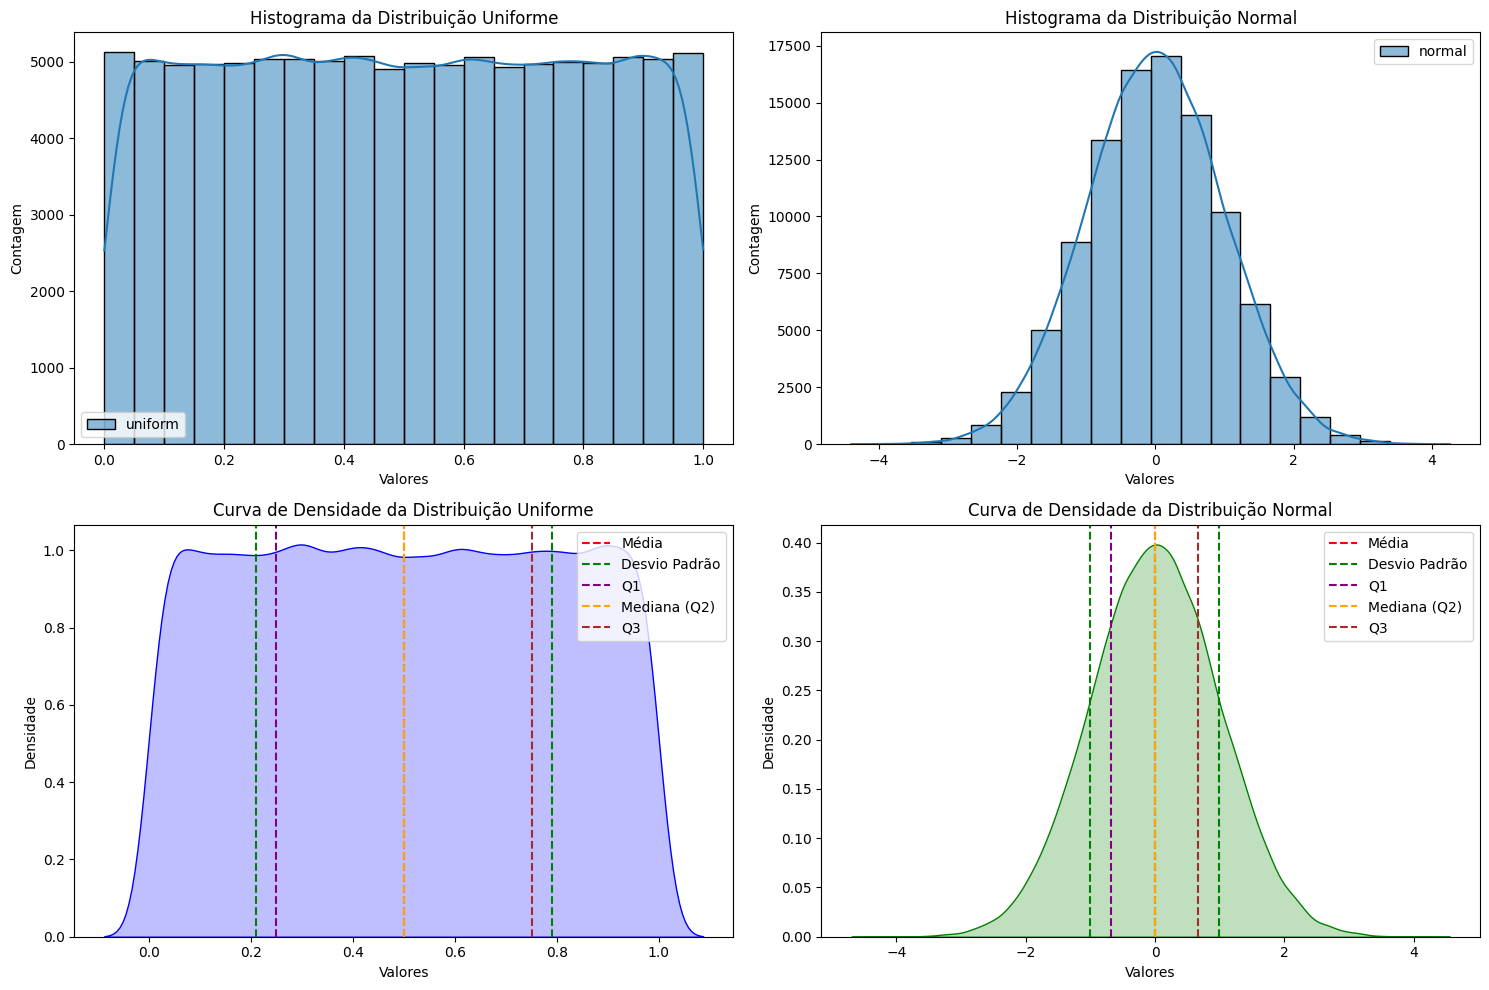
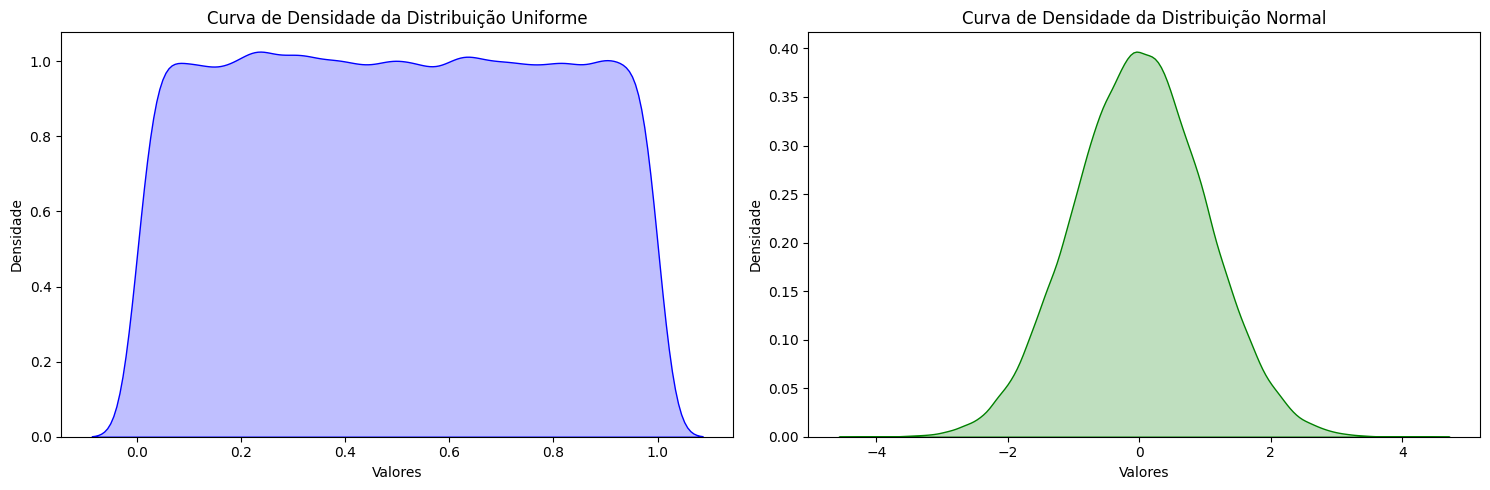

In [5]:

from IPython.display import display, HTML

# Caminho do arquivo HTML gerado
filepath = nome_arquivo_path.replace('"',"").replace('ipynb', 'html')
print(filepath)

# Exibe o conteúdo do arquivo HTML
with open(filepath, 'r', encoding='utf-8') as file:
    html_content = file.read()
    display(HTML(html_content))

## Exportar para PDF

In [6]:
from google.colab import drive
drive.mount('/content/drive')


# !jupyter nbconvert --to pdf --TagRemovePreprocessor.enabled=True {nome_arquivo}
incluir_codigo = True
nome_arquivo_path = '"/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc-dad234-capitulo3.ipynb"'

if incluir_codigo:
    !jupyter nbconvert --to pdf  --no-prompt {nome_arquivo_path}
else:
    !jupyter nbconvert --to pdf --TagRemovePreprocessor.enabled=True {nome_arquivo}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc-dad234-capitulo3.ipynb to pdf
[NbConvertApp] Support files will be in btc-dad234-capitulo3_files/
[NbConvertApp] Making directory ./btc-dad234-capitulo3_files
[NbConvertApp] Making directory ./btc-dad234-capitulo3_files
[NbConvertApp] Writing 52146 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 225272 bytes to /content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de

### Fazer download do arquivo gerado

In [7]:
#  Usando o Google Colab para Download e Visualização Local
from google.colab import drive
drive.mount('/content/drive')

nome_arquivo_path = '"/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc-dad234-capitulo3.ipynb"'

# Caminho para o arquivo PDF
filepath = nome_arquivo_path.replace('"',"").replace('ipynb', 'pdf')

# Baixar o arquivo PDF
files.download(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Visualizar o arquivo gerado

In [8]:
#  Usando o IPython.display para Exibir PDFs
from IPython.display import display, IFrame
filepath = nome_arquivo_path.replace('"',"").replace('ipynb', 'pdf')
display(IFrame(filepath, width=800, height=600))

### Exemplo de como usar um template

In [9]:
template ="""
% Nome do Template: template.tex

\\documentclass[12pt]{article} % Define o tipo de documento

\\usepackage{graphicx} % Permite inserir gráficos/imagens
\\usepackage{fancyhdr} % Permite customizar o cabeçalho/rodapé
\\usepackage{geometry} % Permite customizar margens

% Configuração de margens
\\geometry{
    a4paper,
    left=25mm,
    right=25mm,
    top=30mm,
    bottom=30mm,
}

% Configuração do cabeçalho e rodapé
\\pagestyle{fancy}
\\fancyhf{}
\\fancyhead[L]{Cabeçalho esquerdo}
\\fancyhead[R]{Cabeçalho direito}
\\fancyfoot[C]{Página \thepage} % Numeração da página

\\begin{document}

\\title{Título do Documento}
\\author{Nome do Autor}
\\date{\today}

\\maketitle % Cria o título

\\tableofcontents % Cria o sumário

% Conteúdo do documento começa aqui
\\section{Introdução}
Esta é a seção de introdução.

\\section{Análise}
Esta é a seção de análise.

% Conteúdo do documento termina aqui
\\end{document}
"""

# # Salve o template em um arquivo
# template_path = "meu_template.tex"  # Escolha um nome para o arquivo de template
# with open(template_path, "w") as f:
#     f.write(template)


# # Converte o notebook para PDF usando o template especificado
# !jupyter nbconvert --to pdf --template-file={template_path} {nome_arquivo_path} --output-dir={current_dir}



## Exportar para LaTex

In [10]:
import re
from google.colab import drive
drive.mount('/content/drive')


def export_to_latex(filename: str, output_dir: str) -> None:
    filename = re.sub(r'"', '', filename)
    filename = f'"{filename}"'

    print(f'\n>>> Export LaTex file {filename} to {output_dir} ...')
    !jupyter nbconvert --to latex --no-prompt  {filename}  --output-dir={output_dir}



path_directory = '/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/'
filename = 'btc_dad234_capitulo6.ipynb'
current_dir = os.getcwd()
# filename_path = f'"{os.path.join(path_directory, filename)}"'
filename_path = f'{os.path.join(path_directory, filename)}'

# filename = re.sub(r'"', '', filename_path)
# filename = f'"{filename}"'

# !jupyter nbconvert --to latex {filename} --output-dir={current_dir}
export_to_latex(filename_path, current_dir)


>>> Export LaTex file "/content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc_dad234_capitulo6.ipynb" to /content ...
[NbConvertApp] Converting notebook /content/drive/MyDrive/_Drive Pessoal/Cursos/xpe/Bootcamp - Cientista de Dados/Módulo 2 - Desenvolvimento de Soluções Utilizando Spark/colab_notebook/btc_dad234_capitulo6.ipynb to latex
[WARNING] Could not parse YAML metadata at line 27 column 1: Lexical error near "```"
[WARNING] Could not parse YAML metadata at line 50 column 1: Lexical error near "```"
[NbConvertApp] Writing 130660 bytes to /content/btc_dad234_capitulo6.tex
